# Q1 - image conversion

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img_path = "images/flowingriver.jpg"

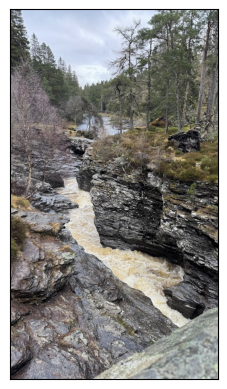

In [3]:
# Display original image

# read using openCV
img = cv.imread(img_path, 1)

# display using matplotlib
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.imshow(img2)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

### Define general plotting function

In [4]:
def plotbyside(
                img1,title1,
                img2=None,title2=None,
                img3=None,title3=None,
                cmap1=None, cmap2=None, cmap3=None,
                figsize=(5,3.5)
    ):
    
    # always have at least 1 image
    if img2 is None and img3 is None:
        plt.imshow(img1, cmap=cmap1)
        plt.title(title1)
        plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
        plt.show()
        return
    
    # error case with img 3 but no img 2
    if img2 is None and img3 is not None:
        raise ValueError("Cannot provide img3 without img2")
    
    # 2 image case
    if img3 is None:
        fig, ax = plt.subplot_mosaic([
            ['img1','img2'],
        ], figsize=figsize)

        ax['img1'].imshow(img1, cmap=cmap1)
        ax['img1'].set_title(title1)
        ax['img1'].axis('off')

        ax['img2'].imshow(img2, cmap=cmap2)
        ax['img2'].set_title(title2)
        ax['img2'].axis('off')
        
        plt.show()
        return
    
    # 3 image case
    fig, ax = plt.subplot_mosaic([
        ['img1','img2','img3'],
    ], figsize=figsize)

    ax['img1'].imshow(img1, cmap=cmap1)
    ax['img1'].set_title(title1)
    ax['img1'].axis('off')

    ax['img2'].imshow(img2, cmap=cmap2)
    ax['img2'].set_title(title2)
    ax['img2'].axis('off')

    ax['img3'].imshow(img3, cmap=cmap3)
    ax['img3'].set_title(title3)
    ax['img3'].axis('off')

    plt.show()

### Convert the image into grayscale and HSV/HLV

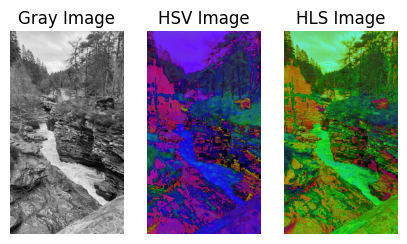

In [5]:
# conversions
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)


plotbyside(img_gray, "Gray Image", img_hsv, "HSV Image", img_hls, "HLS Image",cmap1='gray')

### Binarize grayscale

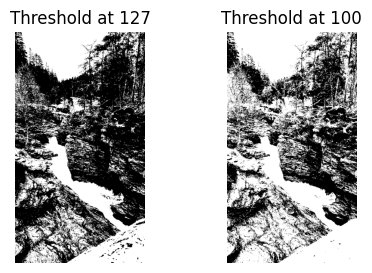

In [6]:
# check alive
assert img_gray is not None, "file could not be read, check with os.path.exists()"  

# thresholding vars
thval1 = 127
thval2 = 100
ret,thresh1 = cv.threshold(img_gray,thval1,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img_gray,thval2,255,cv.THRESH_BINARY)


plotbyside(thresh1, f'Threshold at {thval1}', thresh2, f'Threshold at {thval2}',cmap1='gray',cmap2='gray', figsize=(5,3))



# Geometric transforms

### Translation

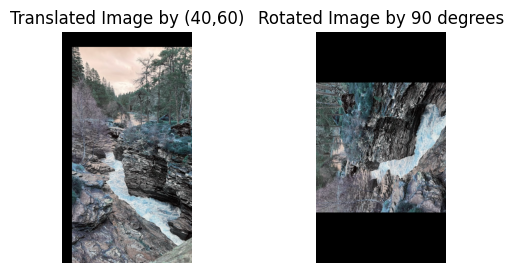

In [ ]:
# check alive
assert img is not None, "file could not be read, check with os.path.exists()"

# find shape 
rows,cols,ch = img.shape

# translation matrix
tx = 40
ty = 60
M_trans = np.float32([[1,0,tx],[0,1,ty]])

# rotation matrix
# rotates with respect to center of image without any scaling
M_rot = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
img_rot = cv.warpAffine(img,M_rot,(cols,rows))

# translate image
img_trans = cv.warpAffine(img,M_trans,(cols,rows))

# display
plotbyside( img_trans, f'Translated Image by ({tx},{ty})', img_rot, 'Rotated Image by 90 degrees', figsize=(6,3))


# Smoothing Filters and Edge Detection

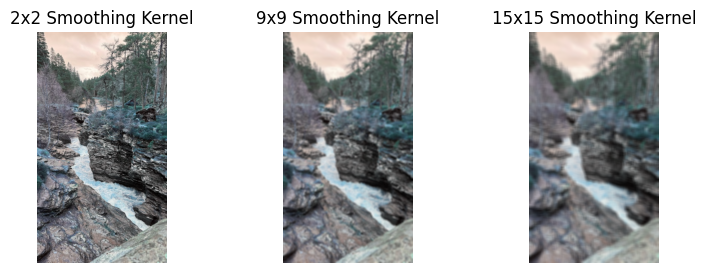

In [15]:
assert img is not None, "file could not be read, check with os.path.exists()"

# matrix for smoothing
kernel1 = np.ones((2,2),np.float32)/4
smoothed1 = cv.filter2D(img,-1,kernel1)

kernel2 = np.ones((9,9),np.float32)/81
smoothed2 = cv.filter2D(img,-1,kernel2)

kernel3 = np.ones((15,15),np.float32)/225
smoothed3 = cv.filter2D(img,-1,kernel3)

plotbyside( smoothed1, '2x2 Smoothing Kernel', smoothed2, '9x9 Smoothing Kernel', smoothed3, '15x15 Smoothing Kernel', figsize=(9,3))

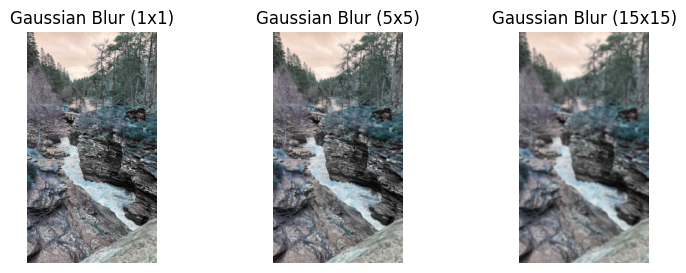

In [16]:
assert img is not None, "file could not be read, check with os.path.exists()"   

# gaussian blur (positive odd integers only)
blur1 = cv.GaussianBlur(img,(1,1),0)
blur2 = cv.GaussianBlur(img,(5,5),0)
blur3 = cv.GaussianBlur(img,(15,15),0)

plotbyside( blur1, 'Gaussian Blur (1x1)', blur2, 'Gaussian Blur (5x5)', blur3, 'Gaussian Blur (15x15)', figsize=(9,3))

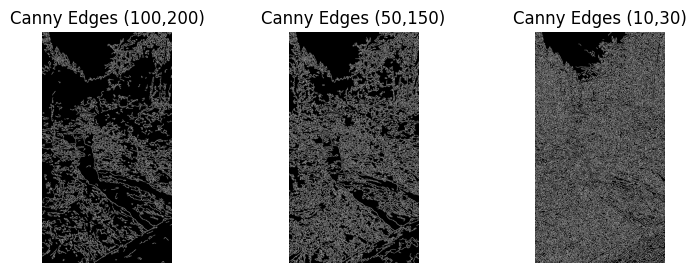

In [20]:
assert img is not None, "file could not be read, check with os.path.exists()"

# blur 2 is the 5x5 gaussian blur from previous cell
edges1 = cv.Canny(blur2,100,200)
edges2 = cv.Canny(blur2,50,150)
edges3 = cv.Canny(blur2,10,30)

plotbyside(edges1, 'Canny Edges (100,200)', edges2, 'Canny Edges (50,150)', edges3, 'Canny Edges (10,30)', cmap1='gray', cmap2='gray', cmap3='gray', figsize=(9,3))

# Intensity Range Adjustment and Hist equalisation

Image dimensions: 512 x 384 pixels with 3 channels


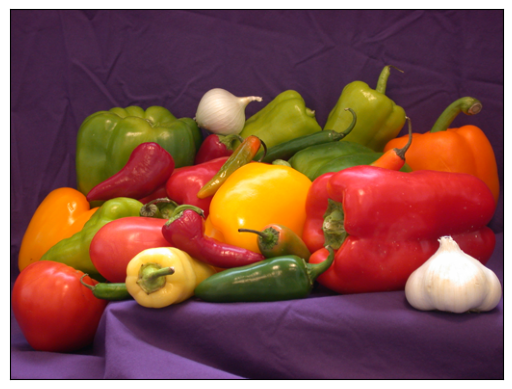

In [26]:
# find image
peppers_path = "images/peppers.png"

img_pep = cv.imread(peppers_path, 1)

assert img_pep is not None, "file could not be read, check with os.path.exists()"

# display using matplotlib
img_pep2 = cv.cvtColor(img_pep, cv.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.imshow(img_pep2)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis

# find width, height and channels
rows,cols,ch = img_pep.shape
print(f'Image dimensions: {cols} x {rows} pixels with {ch} channels')

(([], []), ([], []))

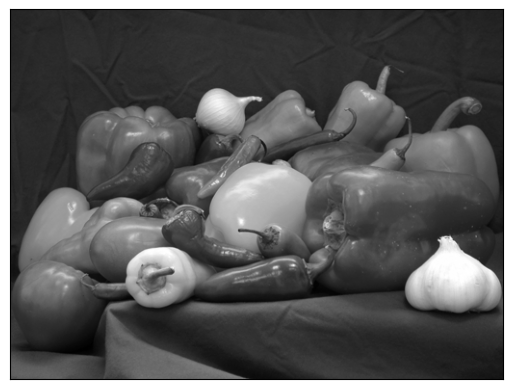

In [32]:
#conv to gscale
img_gray_pep = cv.cvtColor(img_pep, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray_pep, cmap='gray')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis


C:\Users\Luke\AppData\Local\Temp\ipykernel_9284\1869645282.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_gray_pep.ravel(),256,[0,256]); plt.show()


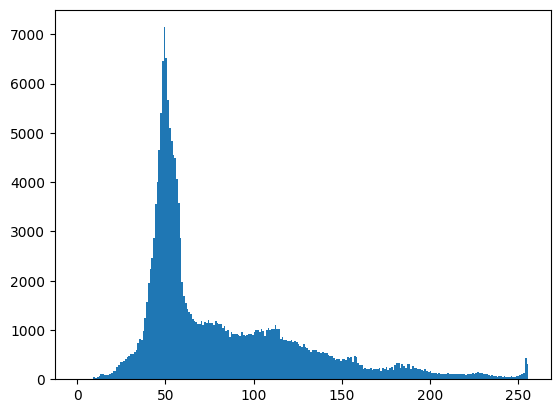

In [36]:
plt.hist(img_gray_pep.ravel(),256,[0,256]); plt.show()

In [ ]:
# reduce the intensity of the image
